<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [AE3] - Playing with our denoiser model
<!-- DESC --> Episode 2 : Using the previously trained autoencoder to denoise data
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Retrieve and use our denoiser model


## What we're going to do :

 - Reload our dataset and saved best model
 - Encode/decode some test images (neved used, never seen by the model)
 
## Data Terminology :
- `clean_train`, `clean_test` for noiseless images 
- `noisy_train`, `noisy_test` for noisy images
- `denoised_test` for denoised images at the output of the model


## Step 1 - Init python stuff
### 1.1 - Init

In [1]:
import numpy as np
import sys
import h5py
import random

import tensorflow as tf
from tensorflow import keras

from modules.MNIST import MNIST

sys.path.append('..')
import fidle.pwk as pwk

run_dir = './run/AE2'
datasets_dir = pwk.init('AE3', run_dir)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.20
Notebook id          : AE3
Run time             : Sunday 14 March 2021, 22:26:16
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run/AE2
Update keras cache   : False
Save figs            : True
Path figs            : ./run/AE2/figs


### 1.2 - Parameters
These **parameters must be identical** to those used during the training in order to have the **same dataset**.\
`prepared_dataset` : Filename of the prepared dataset (Need 400 Mo, but can be in ./data)  
`dataset_seed` : Random seed for shuffling dataset  
`scale` : % of the dataset to use (1. for 100%)  
`train_prop` : Percentage for train (the rest being for the test)

In [2]:
prepared_dataset = './data/mnist-noisy.h5'
dataset_seed     = 123
scale            = .1
train_prop       = .8

Override parameters (batch mode) - Just forget this cell

In [3]:
pwk.override('prepared_dataset', 'dataset_seed', 'scale', 'train_prop')

**\*\* Overrided parameters : \*\***

scale                : 1.0


## Step 2 - Retrieve dataset
With our MNIST class, in one call, we can reload, rescale, shuffle and split our previously saved dataset :-)  
**Important :** Make sure that the **digest is identical** to the one used during the training !\
See : [AE2 / Step 2 - Retrieve dataset](./02-AE-with-MNIST.ipynb#Step-2---Retrieve-dataset)

In [4]:
clean_train,clean_test, noisy_train,noisy_test, _,_ = MNIST.reload_prepared_dataset(scale      = scale, 
                                                                                    train_prop = train_prop,
                                                                                    seed       = dataset_seed,
                                                                                    shuffle    = True,
                                                                                    filename=prepared_dataset )

Loaded.
rescaled (1.0).
Seeded (123)


Shuffled.
splited (0.8).


clean_train shape is :  (56000, 28, 28, 1)
clean_test  shape is :  (14000, 28, 28, 1)
noisy_train shape is :  (56000, 28, 28, 1)
noisy_test  shape is :  (14000, 28, 28, 1)
class_train shape is :  (56000,)
class_test  shape is :  (14000,)
Blake2b digest is    :  849ddca256f308db28ef


## Step 3 - Evaluation
**Note :** We will use the following data:\
`clean_train`, `clean_test` for noiseless images \
`noisy_train`, `noisy_test` for noisy images\
`denoised_test` for denoised images at the output of the model
 
### 3.1 - Reload our best model

In [5]:
model = keras.models.load_model(f'{run_dir}/models/best_model.h5')

### 3.2 - Let's make a prediction

In [6]:
denoised_test = model.predict(noisy_test)

print('Denoised images   (denoised_test) shape : ',denoised_test.shape)

Denoised images   (denoised_test) shape :  (14000, 28, 28, 1)


### 3.3 - Denoised images 

<br>**Noisy test images (input):**

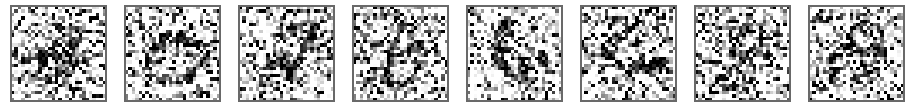

<br>**Denoised images (output):**

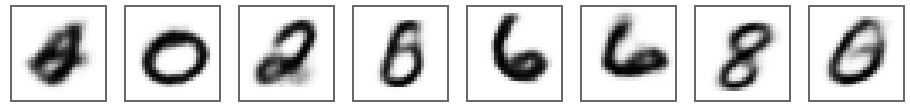

<br>**Real test images :**

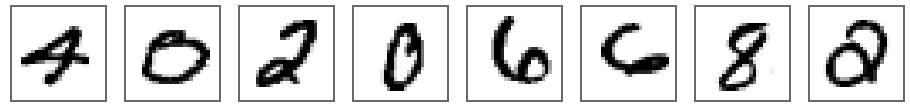

In [7]:
i=random.randint(0,len(denoised_test)-8)
j=i+8

pwk.subtitle('Noisy test images (input):')
pwk.plot_images(noisy_test[i:j], None, indices='all', columns=8, x_size=2,y_size=2, interpolation=None, save_as='05-test-noisy')

pwk.subtitle('Denoised images (output):')
pwk.plot_images(denoised_test[i:j], None, indices='all', columns=8, x_size=2,y_size=2, interpolation=None, save_as='06-test-predict')

pwk.subtitle('Real test images :')
pwk.plot_images(clean_test[i:j], None, indices='all', columns=8, x_size=2,y_size=2, interpolation=None, save_as='07-test-real')

In [8]:
pwk.end()

End time is : Sunday 14 March 2021, 22:26:23
Duration is : 00:00:07 107ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>